In [1]:
DATA_PATH = "../data/processed/01_OHE_data.pkl"
EXPORT_PATH = "../data/processed/02_cleaned_data.pkl"

In [2]:
# Load packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

pd.options.display.max_columns=100
%matplotlib inline

___
## Reading Data:

In [3]:
df = pd.read_pickle(DATA_PATH)
df.head()

,year,engine_hp,engine_cylinders,transmission_type,msrp,speed,acura,alfa_romeo,aston_martin,audi,bentley,bmw,bugatti,buick,cadillac,chevrolet,chrysler,dodge,ferrari,fiat,ford,genesis,gmc,honda,hummer,hyundai,infiniti,kia,lamborghini,land_rover,lexus,lincoln,lotus,maserati,maybach,mazda,mclaren,mercedes-benz,mitsubishi,nissan,oldsmobile,plymouth,pontiac,porsche,rolls-royce,saab,scion,spyker,subaru,suzuki,tesla,toyota,volkswagen,volvo
0,22,335.0,6.0,1,46135,22.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22,300.0,6.0,1,40650,23.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22,300.0,6.0,1,36350,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22,230.0,6.0,1,29450,23.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22,230.0,6.0,1,34500,23.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


___
## Filtering transmission type from 'unknown' data:

In [4]:
df[['transmission_type']].value_counts()

transmission_type
2                    8266
1                    2935
3                     626
4                      68
unknown                19
dtype: int64

In [5]:
df = df[df.transmission_type != 'unknown']
df.shape

(11895, 54)

**Drop Duplicates**

In [6]:
df.drop_duplicates(inplace=True)
df.shape

(10864, 54)

___
## Filtering the msrp column:

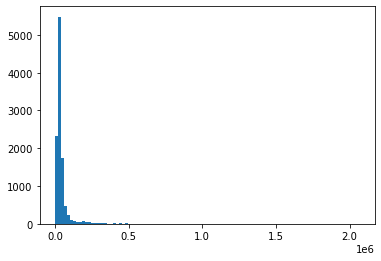

In [7]:
plt.hist(df.msrp, bins=100)
plt.show()

**We can notice that the distribution is skewed which means we have to limit our range of data**

In [8]:
LOWER_LIMIT = 10000
UPER_LIMIT = 70000

print("Values below limit", df.msrp[df.msrp<=LOWER_LIMIT].count())
print("Values above limit", df.msrp[df.msrp>=UPER_LIMIT].count())

Values below limit 1162
Values above limit 1030


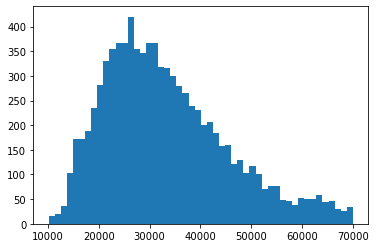

In [9]:
# We have ranged our price to those values which makes sense not any biased data
CONDITION = ((df.msrp > LOWER_LIMIT) & (df.msrp < UPER_LIMIT))

plt.hist(df[['msrp']][CONDITION], bins=50)
plt.show()

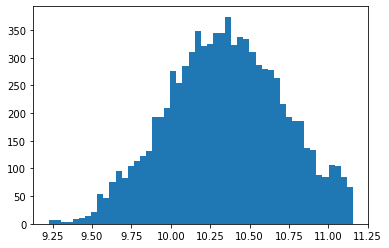

In [10]:
# Try it with log-transformation
price = df[['msrp']][CONDITION]
price = np.log1p(price)
plt.hist(price, bins=50)
plt.show()

___
## We can take the values between limits and then scaling it

### Some great note here:
**`At the first the price data where too large and highly skewed so when I used the model and tried to figure out the vlaue of MSE and MAE they were too large for me to figure out so I tried many thresholds about limits so as not to make my data biased but it wasn't helping so I tried to take the log-transformation of the msrp (price) column to tackle the skewed distribution and the high values and that gave me MSE like 0.3 (it was like MSE=49697558.93) and this corrects things for me`**

In [11]:
# Taking the log-transformation of the msrp column
df[['msrp']] = np.log1p(df[['msrp']][CONDITION])

In [12]:
df = df[CONDITION]
print(df.shape)
df.sample(5)

(8672, 54)


,year,engine_hp,engine_cylinders,transmission_type,msrp,speed,acura,alfa_romeo,aston_martin,audi,bentley,bmw,bugatti,buick,cadillac,chevrolet,chrysler,dodge,ferrari,fiat,ford,genesis,gmc,honda,hummer,hyundai,infiniti,kia,lamborghini,land_rover,lexus,lincoln,lotus,maserati,maybach,mazda,mclaren,mercedes-benz,mitsubishi,nissan,oldsmobile,plymouth,pontiac,porsche,rolls-royce,saab,scion,spyker,subaru,suzuki,tesla,toyota,volkswagen,volvo
11124,26,325.0,6.0,2,10.717768,23.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6542,21,227.0,6.0,2,10.497670,21.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8574,26,170.0,4.0,2,10.101969,28.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10797,20,177.0,4.0,2,10.363946,32.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8871,27,333.0,6.0,3,10.934909,23.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


___
## Finally filter null values:

In [13]:
print("shape before dropping nulls:", df.shape)
df.dropna(inplace=True)
print("shape after dropping nulls:", df.shape)

shape before dropping nulls: (8672, 54)
shape after dropping nulls: (8592, 54)


In [14]:
df.isnull().any().sum()

0

___
## Quick review of the data:

In [15]:
df.sample(1).iloc[0]

year                        25
engine_hp                201.0
engine_cylinders           4.0
transmission_type            1
msrp                 10.681114
speed                     27.0
acura                      0.0
alfa_romeo                 0.0
aston_martin               0.0
audi                       0.0
bentley                    0.0
bmw                        0.0
bugatti                    0.0
buick                      0.0
cadillac                   0.0
chevrolet                  0.0
chrysler                   0.0
dodge                      0.0
ferrari                    0.0
fiat                       0.0
ford                       0.0
genesis                    0.0
gmc                        0.0
honda                      0.0
hummer                     0.0
hyundai                    0.0
infiniti                   0.0
kia                        0.0
lamborghini                0.0
land_rover                 0.0
lexus                      0.0
lincoln                    0.0
lotus   

___
## Exporting the cleaned data:

In [16]:
df.to_pickle(EXPORT_PATH)